### Problem 1

High-Dimensional Objectives

The "[Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)" often refers to issues that arise when our **feature space** is high-dimensional, usually due to sparsity in our data. 

But high dimensionality in our **parameter space** (the set containing all combinations of our model's parameter values) can lead to issues too!


®Why do we use numerical approximation methods to optimize our loss functions in deep learning? Why can't we analytically solve for the minima?


Since when the data and feature set become high-dimension and complex, the gradient function will be complicated and will be hard to solve analytically. Therefore, we need to use numerical approximation methods to improve the efficiency of calculation.

### Problem 2

In this problem, we'll argue for another pitfall that arises in higher-dimensional parameter spaces.


Suppose we have a scalar-valued function $f : \mathbb{R}^d \rightarrow \mathbb{R}$, where $d$ represents the dimensionality of our domain (perhaps the parameter space of a given model).

The Hessian of a function describes its local curvature.


® How do we know that the Hessian is a symmetric matrix? You can just cite a theorem which ensures this.


By Schwarz's theorem, the hypothesis of continuity of the second derivatives implies that the order of differentiation does not matter. 

### Problem 3

® How do we know that the Hessian will have $d$ real eigenvalues? You can cite a theorem for this.


The symmetric matrix is also a Hermitian matrix in terms of the real number field. By spectral theorem, it has d real eigenvalues.

### Problem 4

®Suppose $\mathbf{x} \in \mathbb{R}^d$ is a critical point for $f$ (i.e. $\nabla f(\mathbf{x}) = \mathbf{0}$ ).

What do we know about the Hessian matrix  $\mathbf{H}f(\mathbf{x})$ if $\mathbf{x}$ is a local minimum? What if $\mathbf{x}$ is a saddle point?


If x is a local minimum, hte Hessian matrix Hf(x) is positive semidefinite. If x is a saddle point, then Hf(x) has both positive and negative eigenvalues and indefinite.

### Problem 5

®Suppose that $\mathbf{x}$ is a critical point of $f$ and that  $\mathbf{H}f(\mathbf{x})$ has I.I.D. eigenvalues, each of which is equally likely to be positive or negative.

Derive expressions for $P(\mathbf{x}\text{ is min})$, the probability $f$ has a local minimum, and $P(\mathbf{x}\text{ is saddle})$, in terms of $d$.


Suppose the dimension of domain is d, then the P(x is min) = 1/(2^d) and P(x is saddle) = 1 - 1/(2^(d-1))

### Problem 6

®Using the same setup as in the previous problem, find  $\displaystyle \lim_{d\rightarrow \infty} P(\mathbf{x}\text{ is min})$  and  $\displaystyle \lim_{d\rightarrow \infty} P(\mathbf{x}\text{ is saddle})$. Using the limiting behavior of each, what conclusions can you draw about the relationship between minima, saddle points and the dimensionality of the domain?


As d goes to infinity, both 1/(2^d) and 1/(2^(d-1)) converges to 0. Therefore, $\displaystyle \lim_{d\rightarrow \infty} P(\mathbf{x}\text{ is min}) = 0$ and $\displaystyle \lim_{d\rightarrow \infty} P(\mathbf{x}\text{ is saddle}) = 1$. In conclusion, as the dimensionality of the domain increases, the probability of getting saddle points will incresase and the probability of getting minima will decrease.

### Problem 7

®Name two limitations with this problem setup. Are there any classes of functions that we may be excluding with this analysis?


This setup excludes the incontinuous functions and non-convex functions. 

### Problem 8

Issues with Adam

In this week's lecture, we discussed multiple algorithms for optimizing objective functions. One of the most popular options is Adam (Adaptive Moment Estimation), which updates our parameters using exponential moving averages.

But in the face of local minima, Adam and other optimizers are not flawless.  The use of things like momentum helps keep the optimization from getting stuck on rough parts of the objective function when the overall surface is sloping down.

In this problem, you'll identify some issues with the Adam algorithm on concrete examples based on Adam parameter and start point selections.


® Navigate to [vis.ensmallen.org](https://vis.ensmallen.org/). Using their visualization tools, select two different functions and identify a set of parameters for which Adam succeeds and fails.  What two functions are probably not possible to minimize?   

Note: Including screenshots are a great way to answer this question.


![](https://drive.google.com/uc?export=view&id=1cEb1UdPV8nsGUkgOmimgq9_O8s63SyDL)

![](https://drive.google.com/uc?export=view&id=1vZeGVdlBQ0tChXolgnqvjim6B5jhuMql)

![](https://drive.google.com/uc?export=view&id=1U2LK0IxVVOMpESHpo1XY1D08SS_CtABQ)

The first pictures succeds and the second and third one fails to find the local minimum. The function indeicated by the 4th graph on the website and the last graph on the website are probably not possible to minimize.

### Problem 9

The $n$-dimensional **Rastrigin function**, $f : \mathbb{R}^n \rightarrow \mathbb{R}$,  is defined as

$\displaystyle f(x_1,...,x_n) = 10n + \sum_{i=1}^n (x_i^2 - 10\cos(2\pi x_i))$.

For this problem, we'll deal with the 2-dimensional case

$\displaystyle f(x_1, x_2) = 20 + \sum_{i=1}^2 (x_i^2 - 10\cos(2\pi x_i))$.

```python
!pip install -q tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf

from typing import Callable, List, Tuple

def rastrigin(n : int) -> Callable[[], float]:
  "Return the n-dimensional Rastrigin function as a callable."
  
  def func(vector : Tuple[float]) -> float:

    # Make sure our input is n-dimensional
    assert len(vector) == n, "invalid input dimension -- must be shape "+str(n)

    # Sum square terms of each component in input vector
    squares = sum([x**2 for x in vector])
    # Sum cosine terms of each component
    cosines = sum([10 * np.cos(2 * np.pi * x) for x in vector])
    # Return the value
    return 10*n + squares - cosines

  # Return the callable function
  return func

# Partial application - define f as 2-dimensional!
f = lambda x, y : rastrigin(2)([x, y])
'done!'
```


In [ ]:
!pip install -q tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf

from typing import Callable, List, Tuple

def rastrigin(n : int) -> Callable[[], float]:
  "Return the n-dimensional Rastrigin function as a callable."
  
  def func(vector : Tuple[float]) -> float:

    # Make sure our input is n-dimensional
    assert len(vector) == n, "invalid input dimension -- must be shape "+str(n)

    # Sum square terms of each component in input vector
    squares = sum([x**2 for x in vector])
    # Sum cosine terms of each component
    cosines = sum([10 * np.cos(2 * np.pi * x) for x in vector])
    # Return the value
    return 10*n + squares - cosines

  # Return the callable function
  return func

# Partial application - define f as 2-dimensional!
f = lambda x, y : rastrigin(2)([x, y])
'done!'

'done!'

® Comment on the convexity of $f$ and justify your answer. What does this tell us about the potential for saddle points and local minima?


f is a non-convex function. The second derivative of f is [[$2 + 40\pi^2 * sin(2\pi x_1)$, 0]. [0, $2 + 40\pi^2 * sin(2\pi x_2)$]]. The eigenvalues of this symmetric diagonal matrix depends on the value of $x_1, x_2$. Therefore, When both x1 and x2 fall in a certain range, such as around zero closely, both eigenvalues are both positive and hessian is positive definite, which indicates a local minimum. Reversely, when the hessian is negative definite, which indicates a local maximum. At last, there are sections where one of them is positive and the other is negative, which means the eigenvalues have opposite signs, which indicates a saddle point.

### Problem 10

A surface plot of the Rastrigin function $f$ is shown below.

Use this 3D plot to estimate the global minimum (the global min is present in the given interval).


Use [matplotlib.pyplot.contour](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html) to plot an appropriate contour set around this minima.

® Present the level sets/contours you feel best justifies this estimate.


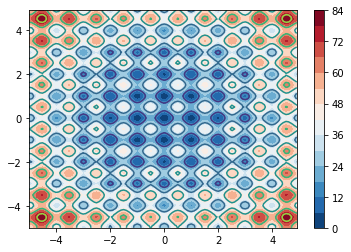

In [ ]:
from matplotlib.pyplot import contour
import matplotlib.pyplot as plt
import numpy as np
delta = 0.1
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
z = np.array([np.array([f(i, j) for i in x]) for j in y])
fig, ax = plt.subplots()
ax.contour(X,Y,z)
cntr = ax.contourf(x, y, z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)

### Problem 11

® At the global minimum $\mathbf{x}^*$ you found, compute the Hessian $\mathbf{H}f(\mathbf{x}^*)$. Characterize the area around $\mathbf{x}^*$ as "bowl" or "valley"-like.


The global minimum is (0,0). The hessian matrix $\mathbf{x}^*$ is $[[2, 0], [0, 2]]$. The area around $\mathbf{x}^*$ is "bowl-like".

### Problem 12

The following script uses the Adam optimizer to minimize the Rastrigin function. It uses the default Adam parameters through Keras, and runs for 1,000 iterations. It saves the path it traced as `x_history, y_history` and `z_history`.

```python
import tensorflow as tf

# Initialize Adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Change parameters here!

# Initial (x, y) values
x = tf.Variable(5.0)
y = tf.Variable(5.0)

# Define the objective function
objective = lambda: rastrigin(2)([x, y])

# HYPERPARAM :: iterations - edit this!
iter : int = 1000
x_history = []
y_history = []
z_history = []

for _ in range(iter):
    # Step using Adam
    opt.minimize(objective, [x, y]).numpy()

    # Append values to history
    x_history.append(x.numpy())
    y_history.append(y.numpy())
    z_history.append(objective())
'done!'
```


In [ ]:
import tensorflow as tf

# Initialize Adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Change parameters here!

# Initial (x, y) values
x = tf.Variable(5.0)
y = tf.Variable(5.0)

# Define the objective function
objective = lambda: rastrigin(2)([x, y])

# HYPERPARAM :: iterations - edit this!
iter : int = 1000
x_history = []
y_history = []
z_history = []

for _ in range(iter):
    # Step using Adam
    opt.minimize(objective, [x, y]).numpy()

    # Append values to history
    x_history.append(x.numpy())
    y_history.append(y.numpy())
    z_history.append(objective())
'done!'

'done!'

® Play around with the Adam parameters and hyperparameters, as well as with the starting point $(x_0, y_0)$. 

Choose one set of the above where Adam converges to the global minimum. List the various choices you made and why, and use the histories to plot Adam's progress on a 2D contour plot of the Rastrigin function. Make sure the line is clearly visible.

Then, find one configuration of parameters, hyperparameters and starting point where Adam does _not_ converge to the global minimum. What is causing Adam to get stuck?

In both cases, make sure to clearly display the final x- and y-coordinates, i.e. Adam's estimate of the minimum.


Minimum Find: (-1.808618999263062e-22, -1.808618999263062e-22)


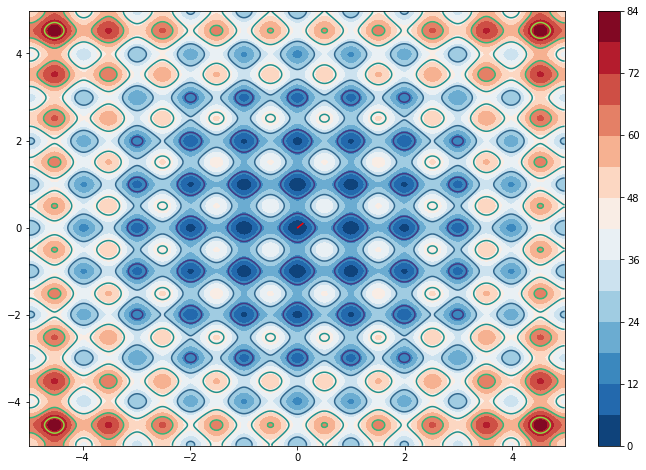

In [ ]:
x = tf.Variable(0.1)
y = tf.Variable(0.1)
x_history = []
y_history = []
z_history = []
opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Change parameters here!
objective = lambda: rastrigin(2)([x, y])
for _ in range(1000):
    opt.minimize(objective, [x, y]).numpy()
    x_history.append(x.numpy())
    y_history.append(y.numpy())
    z_history.append(objective())
delta = 0.025
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
z = np.array([np.array([f(i, j) for i in x]) for j in y])
fig, ax = plt.subplots(figsize=(12,8))
ax.contour(X,Y,z)
cntr = ax.contourf(x, y, z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)
ax.plot(x_history, y_history, c='r')
print("Minimum Find: ({}, {})".format(x_history[-1], y_history[-1]))

Minimum Find: (1.1192256212234497, 1.1192256212234497)


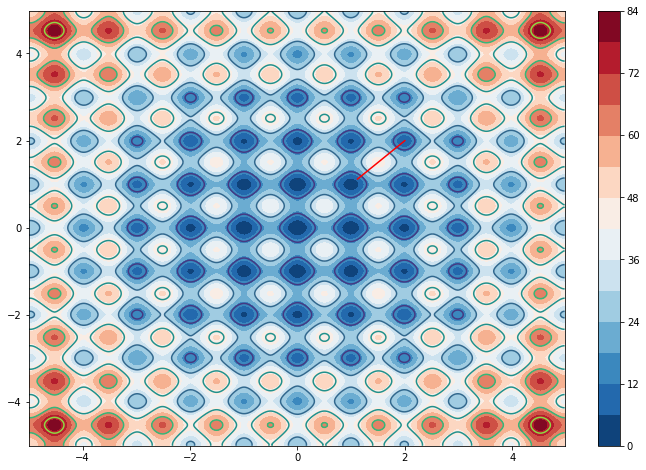

In [ ]:
x = tf.Variable(2.0)
y = tf.Variable(2.0)
x_history = []
y_history = []
z_history = []
opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Change parameters here!
objective = lambda: rastrigin(2)([x, y])
for _ in range(1000):
    opt.minimize(objective, [x, y]).numpy()
    x_history.append(x.numpy())
    y_history.append(y.numpy())
    z_history.append(objective())
delta = 0.025
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
z = np.array([np.array([f(i, j) for i in x]) for j in y])
fig, ax = plt.subplots(figsize=(12,8))
ax.contour(X,Y,z)
cntr = ax.contourf(x, y, z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)
ax.plot(x_history, y_history, c='r')
print("Minimum Find: ({}, {})".format(x_history[-1], y_history[-1]))

Succeed: x = 0.1, y = 0.1, learning_rate = 0.0001. I tried serveral learning rates and find that the learning rate ahs to be very small to reach the global minimum given enough iterations.

Failed: x = 2, y = 2, learning_rate - 0.0001. The Adam stuck as the opt is trapped within a local minimum and do not have enough momentum to get out.

### Problem 13

®Now, define and plot the Rosenbrock function,

$\displaystyle g(x, y) = (1-x)^2 + 100(y-x^2)^2.$
 
Use the domain $[-3, 3] \times [-3, 3]$.

Without any calculation, is $g$ valley- or bowl-shaped around its global minimum?


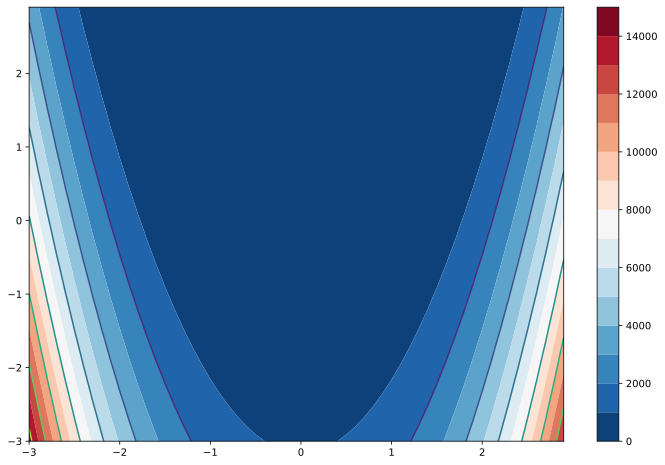

In [20]:
from matplotlib.pyplot import contour
import matplotlib.pyplot as plt
import numpy as np

delta = 0.1
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
X, Y = np.meshgrid(x, y)
z = np.array([np.array([g(i, j) for i in x]) for j in y])
fig, ax = plt.subplots(figsize=(12,8))
ax.contour(X,Y,z)
cntr = ax.contourf(x, y, z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)

The global minimum is 0 at (1, 1). Around the global minimum, g is "valley-shaped" because the coefficient of the first term, 1, is much smaller than the coefficient of the second term, 100. Therefore, there will be growth in certain directions that is much larger than that of the others, which will cause valley shape around gloabl minimum.

### Problem 14

® Try to minimize the Rosenbrock function $g$ as we did with the Rastrigin function. Is Adam as well-behaved? What does this tell you about Adam's performance on bowl-shaped minima vs. valley-shaped ones?


Minimum Find: (0.9879883527755737, 0.976074755191803)


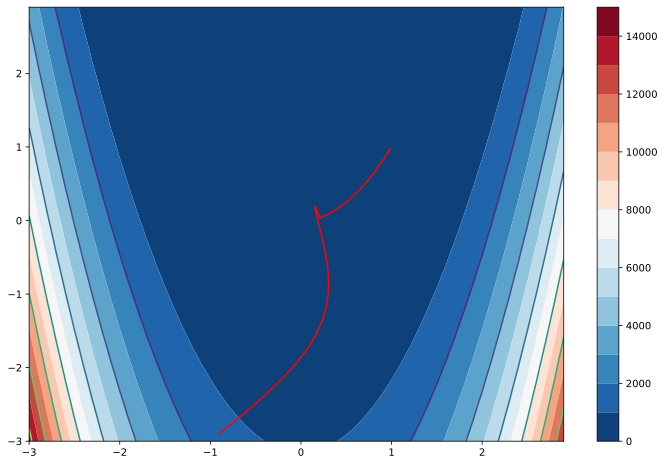

In [28]:
x = tf.Variable(-1.0)
y = tf.Variable(-3.0)
x_history = []
y_history = []
z_history = []
g = lambda x, y: (1-x)**2 + 100*(y-x**2)**2
opt = tf.keras.optimizers.Adam(learning_rate=0.1) # Change parameters here!
objective = lambda: g(x, y)
for _ in range(3000):
    opt.minimize(objective, [x, y]).numpy()
    x_history.append(x.numpy())
    y_history.append(y.numpy())
    z_history.append(objective())
delta = 0.1
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
X, Y = np.meshgrid(x, y)
z = np.array([np.array([g(i, j) for i in x]) for j in y])
fig, ax = plt.subplots(figsize=(12,8))
ax.contour(X,Y,z)
cntr = ax.contourf(x, y, z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)
ax.plot(x_history, y_history, c='r')
print("Minimum Find: ({}, {})".format(x_history[-1], y_history[-1]))

The Adam algorithm performs well on the Rosenbrock function with experiments on different starting points on different position of this valley, and with learning_rate 0.1. It just take more steps to find the local minimum, since it was trapped in the middle of the valley for a bit time. After all, I think adam can optimize well both in bowl like and valley like shapes.

### Problem 15

® [Yogi](http://d2l.ai/chapter_optimization/adam.html#yogi) is a recent improvement to Adam. How does it augment the Adam algorithm to increase performance?

Construct one scenario (either on one of the functions we discussed or an entirely new one) where Adam diverges but Yogi converges on the global minimum. Why might it be hard for us to witness this improvement with our current setup?


Minimum Find: (0.9040541648864746, 0.8169282674789429)


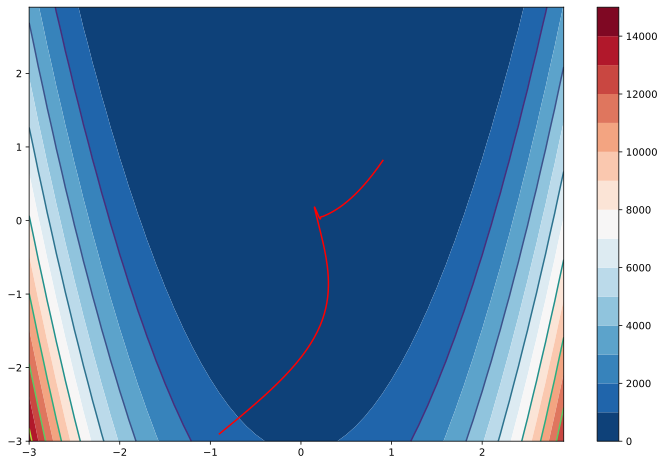

In [30]:
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt

yogi_opt = tfa.optimizers.Yogi(learning_rate=0.1
)
x = tf.Variable(-1.0)
y = tf.Variable(-3.0)
x_history = []
y_history = []
z_history = []
g = lambda x, y: (1-x)**2 + 100*(y-x**2)**2
objective = lambda: g(x, y)
for _ in range(3000):
    yogi_opt.minimize(objective, [x, y]).numpy()
    x_history.append(x.numpy())
    y_history.append(y.numpy())
    z_history.append(objective())
delta = 0.1
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
X, Y = np.meshgrid(x, y)
z = np.array([np.array([g(i, j) for i in x]) for j in y])
fig, ax = plt.subplots(figsize=(12,8))
ax.contour(X,Y,z)
cntr = ax.contourf(x, y, z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr, ax=ax)
ax.plot(x_history, y_history, c='r')
print("Minimum Find: ({}, {})".format(x_history[-1], y_history[-1]))

I tried the same set of points for Yogi and Adam on the Rosnebrock function with learning_rate 0.1. Within the same number of steps, Yoji does not optimize as fast as Adam.

### Problem 16

Thought-Provoking
®Explain the difference in goals between pure optimization and optimization in deep learning.


In optimization, we have a single well-defined metric that we want to minimize (or maximize). Unfortunately, in Deep Learning we often use metrics that are impossible or very hard to optimize on. In optimization, we care only about the data in hand. We know that finding the maximum value will be the best solution to our problem. In Deep Learning, we mostly care about generalization i.e the data we don’t have. It means that even if we find the maximum (or minimum) value for the data we do have (the training set) we may still get poor results on the data we don’t have.

### Problem 17

As we covered earlier in the course, a common method to lower generalization error and reduce overfitting is to introduce a weight-decay term to our loss function.

Our cost function $J$ is then a linear combination of our loss $L$ and our decay term $R$.
$\displaystyle J(\mathbf{w}) = L(\mathbf{w}) + \lambda R(\mathbf{w})$


® Consider $L_1$ regularization. It seeks to minimize the magnitude of all the weights, getting as close to zero as possible without compromising performance. In terms of optimization, what are the pros and cons of instead just setting hard limits on the magnitudes of each weight?


Pro: The weights will not be reduced to zero as the iteration increases. Therefore, a local minimum will be find in a robust way. Also, it will prevent the algorithm to skip or pass over the global minimum. It will also help prevent gradient exploding and vanishing.

Con: A bad initialization will influence the Gradient Descent severely, because the some weights initialization, when high, will lead to a non-optimized local minimum. Also, setting the limit will prevent weights from finding gradients in a valley-shaped level sets.

### Problem 18